#**1 - Model Inference**

## 1.1 Import Libraries

In [1]:
# Import libraries
import pickle
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt

## 1.2 Load the model

In [8]:
# Load the model
with open('SVMModel.pkl', 'rb') as file1:
  SVMModel = pickle.load(file1)

with open('Scaling.pkl', 'rb') as file1:
  scaler = pickle.load(file1)

## 1.3 Load the Data

In [3]:
# Data loading
data = pd.read_csv('https://raw.githubusercontent.com/andik-alfauzi/Final-Project/main/sample_dataset_timeseries_noarea.csv')

# Change into datetime
data['week_start_date'] = pd.to_datetime(data['week_start_date'], format = '%Y-%m-%d')

# Create a dataframe to inferencing
salesFlow = data.groupby('week_start_date')['quantity'].sum()

# Display
salesFlow

week_start_date
2021-12-27     128808
2022-01-03    3839557
2022-01-10    4138934
2022-01-17    4149077
2022-01-24    4824273
               ...   
2023-03-06    4775638
2023-03-13    4787111
2023-03-20    4757590
2023-03-27    6001166
2023-04-03    4172070
Name: quantity, Length: 67, dtype: int64

## Create a windows of sales

In [5]:
# Create a windows=4
windows = 4
X = []
y = []

for index in range(0, len(salesFlow) - windows):
  X.append(salesFlow[index : windows + index])
  y.append(salesFlow[windows + index])

X = np.array(X)
y = np.array(y)

## Model Forecasting

In [6]:
# Define forecasting function
def forecast(week):
  salesForecast = salesFlow.copy()
  windows = 4
  for i in range(week):
    X = np.array(salesForecast[-windows:].values).reshape(1, -1)
    X_scaled = scaler.transform(X)

    # add 7 last day into dataset
    lastDate = salesForecast.index[-1]
    newDate = lastDate + pd.Timedelta(days=7)

    # make sure the date are valid
    while True:
      _, lastDay = calendar.monthrange(newDate.year, newDate.month)
      if newDate.day <= lastDay:
        break
      newDate -= pd.Timedelta(days=1)

    salesForecast[newDate] = round(SVMModel.predict(X_scaled)[0])

  return salesForecast

In [9]:
# Forecasting the sales
salesForecast = forecast(4)

# Display forecast
salesForecast

week_start_date
2021-12-27     128808
2022-01-03    3839557
2022-01-10    4138934
2022-01-17    4149077
2022-01-24    4824273
               ...   
2023-04-03    4172070
2023-04-10    4769984
2023-04-17    4290282
2023-04-24    4436591
2023-05-01    4771702
Name: quantity, Length: 71, dtype: int64

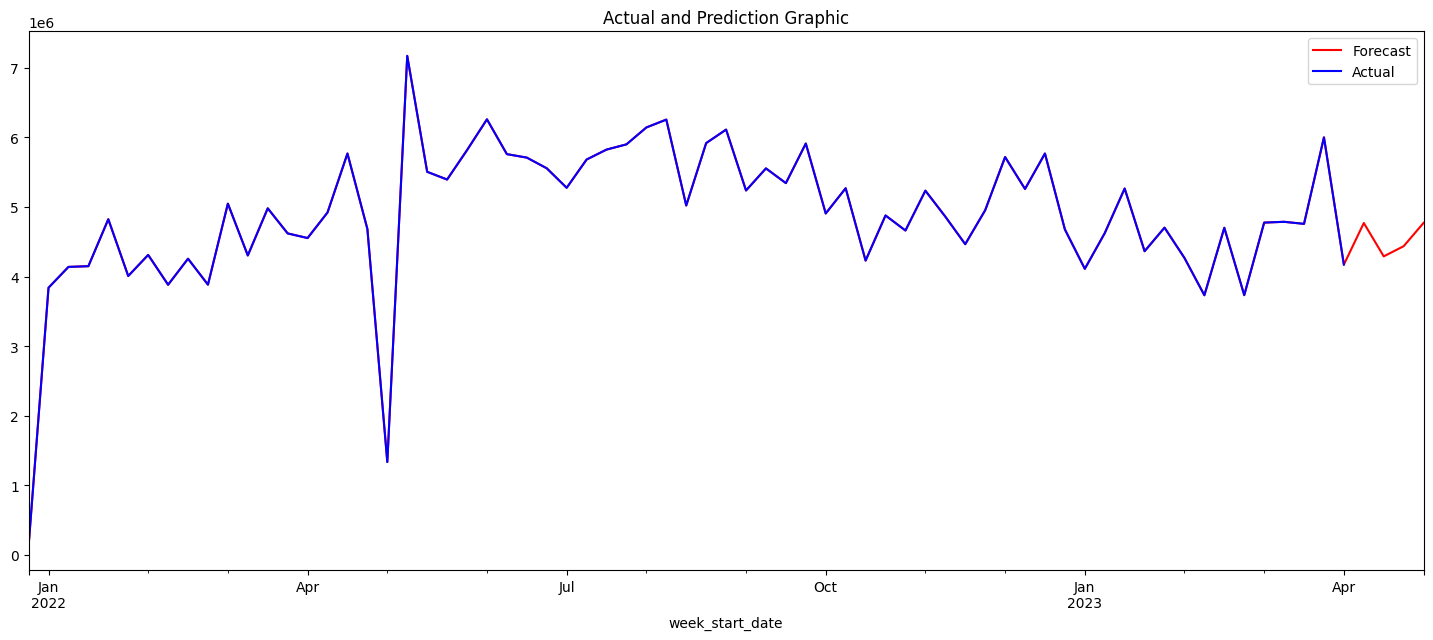

In [14]:
# Forecast visualization
salesForecast.plot(color='red', label='Forecast', figsize=(18, 7))
salesFlow.plot(color='blue', label='Actual')
plt.title('Actual and Prediction Graphic')
plt.legend()
plt.show()

In [13]:
# Displaying data forecast only
salesForecast.tail(4)

week_start_date
2023-04-10    4769984
2023-04-17    4290282
2023-04-24    4436591
2023-05-01    4771702
Name: quantity, dtype: int64